In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ase import Atoms
from ase.io import read,write
from ase.visualize import view
import nglview

## Tasks

### Task 1

Let's begin with some theory. The energy of system of atoms is:

$H = \sum_i p_i/2m_i + VR_i$.

Expanding $V$ around equilibrium ($\sum_i\partial{V}/\partial{R_i}=0$):

$H = V_0 + \frac{1}{2}\sum_{ij} \frac{\partial{V}}{\partial{R_i}\partial{R_j}}\Delta R_i\Delta R_j$

which, in matrix form reads:

$H = V_0 + \frac{1}{2}\{P_{3N}\}\begin{bmatrix}{M_i}^{-1} &&\\ && \\ &&\\ \end{bmatrix}\{P_{3N}\}^T + 
\frac{1}{2}\{\Delta R_{3N}\}\begin{bmatrix}{k_{ij}} &&\\ && \\ &&\\ \end{bmatrix}\{\Delta R_{3N}\}^T$


$H = V_0 + \frac{1}{2}\{P_i(\sqrt{M_i})^{-1}\}\{P_i(\sqrt{M_i})^{-1}\}^T + 
\frac{1}{2}\{\Delta R_i(\sqrt{M_i})^{-1}\}\underbrace{\begin{bmatrix}{k_{ij}(\sqrt{M_iM_j})^{-1}} &&\\ && \\ &&\\ \end{bmatrix}}_{\text{Hessian matrix}}\{\Delta R_i(\sqrt{M_i})^{-1}\}^T$

In the basis basis states of the Hessian matrix, the above equation can be written:


$H = V_0 + \frac{1}{2}\{\pi_i\}\{\pi_i\}^T + 
\frac{1}{2}\{\delta\rho_i\}\begin{bmatrix}{\omega_i} &&\\ &\ddots& \\ &&\\ \end{bmatrix}\{\delta\rho_i\}^T$


where ${\delta\rho_i},{\pi_i}$ are the mass normalized position and momentum vectors. The above equation corresponds to a set of **uncoupled harmonic oscillators**:

$\boxed{H = V_0 + \frac{1}{2}\sum_{\alpha} \Big( \frac{\pi_{\alpha}^2}{2} + \frac{\omega_{\alpha}2}{2}\rho_{\alpha}^2 \Big)}$

The **molden** file contains the eigenvalues and eigenvectors of the Hessian matrix. The eigenvectros corresponds to the atomic displacements and the eigenvalues are the vibrational frequencies. Your task is to devise a method to display the vibrational modes, making use of the *vibr_displacements* and *atoms*(ase.Atoms object) returned by the function *read_molden*. 

For the purpose, complete the skeleton function *get_trajectory*, which is initialized in a cell below, and make use of the ase.Atoms class, which is initialized with a list of atomic elements and their respective coordinates. 

**Hint**: Write the equation of motion (Lagrangian) for the equation above and find the time evolution of the atoms for a given normal mode.

### Task 2
- Compare the vibrational frequencies of methanol with experiments (see paper) and the one of benzene with literature on the internet.
- Which kind of modes will correspond to stretching of CH and CC bonds?
- Try to animate some frequencies, and report the kind of mode corresponding to all peaks.
- In the methanol case, you can compare the result you obtained with the one with better basis set and convergence. 
- Examine the differences between the file vib.c6h6.inp and the vib.c6h6.ref, and the difference in spectra. Discuss.

## Funcitons:

**read_molden(file):**

    input: 
        file               - molden filename
    return:
        atoms              - ase.Atom object
        frequency          - vibrational frequencies
        vibr_displacements - vibrational atomic displacements in Angstrom    
        
**get_trajectory(mode):**

    input:
        mode               - mode number
    return:
        trajectory         - trajectory of atomic displacements for specified mode 

In [2]:
def read_molden(file):
    
    with open(file) as f:
        data = f.readlines()

    freq = []
    info_atoms = [] # element, x, y, z
    vibr_displacements = [] # [vibration_nr][coord]

    inten = []


    section = ''
    b2A=0.52917721067
    # Parse the datafile
    for line in data:
        line = line.strip()

        # Are we entering into a new section?
        if line[0] == '[':
            section = line.strip('[]').lower()
            continue

        if section == 'freq':
            freq.append(float(line))

        if section == 'fr-coord':
            el, x, y, z = line.split()
            info_atoms.append([el, float(x)*b2A, float(y)*b2A, float(z)*b2A])

        if section == 'fr-norm-coord':
            if line.startswith('vibration'):
                vibr_displacements.append([])
                continue
            coords = [float(x) for x in line.split()]
            vibr_displacements[-1].append(coords)

        if section == 'int':
            inten.append(float(line))

    vibr_displacements = np.asanyarray(vibr_displacements)
    info_atoms = np.asanyarray(info_atoms)
    atoms = Atoms(info_atoms[:,0], info_atoms[:,1:4])

    return atoms, freq, vibr_displacements

In [3]:
def get_trajectory(mode):
    enhance_disp = 2.0
    time_arr = np.linspace(0.0, 2*np.pi, 20)

    trajectory = []
    for time in time_arr:
        vibr_atoms = Atoms(a.get_chemical_symbols(), a.positions+enhance_disp*np.sin(time)*vibr_displacements[mode])
        trajectory.append(vibr_atoms)
    return trajectory

## Read molden file 

In [4]:
file = "./C6H6-VIBRATIONS-1.ref.mol"
a, freq, vibr_displacements = read_molden(file)

## View atoms at equilibrium

In [5]:
nglview.show_ase(a)

NGLWidget()

## Plot spectrum

Text(0.5, 0, 'Energy [cm$^{-1}$]')

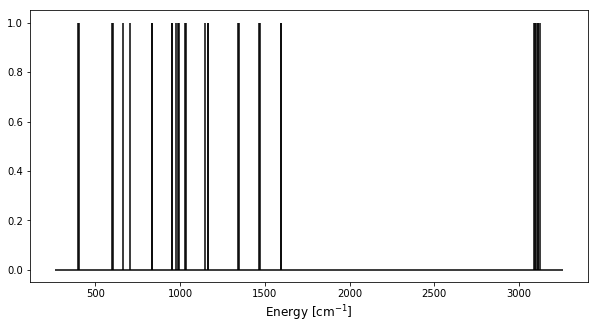

In [6]:
plt.figure(figsize=(10,5))
plt.vlines(freq,np.zeros(len(freq)),np.ones(len(freq)))
plt.hlines(0,*plt.xlim())
plt.xlabel('Energy [cm$^{-1}$]',fontsize=12)

## Visualize vibrational mode

In [7]:
mode = 3
trajectory = get_trajectory(mode)
nglv = nglview.show_asetraj(trajectory, gui=True)
nglv

NGLWidget(count=20)